Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
data = pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,70.0,36.0,50.0,72.0,24.4,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,50.0,30.0,53.0,54.0,22.6,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,37.0,18.0,NaN,66.0,23.2,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,80.0,40.0,79.0,78.0,21.2,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,39.0,34.0,35.0,56.0,23.4,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


### **DATA UNDERSTANDING**

In [5]:
data.shape

(13994, 30)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

Target column is 'selection', a integer column which have 2 values - '0' (representing the player is not selected) and '1' (representing the player is selected)

In [7]:
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,13994.000000,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,28.536730,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,9.735249,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,2.000000,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,25.000000,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,31.000000,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,35.000000,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,50.000000,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


**EXPLORATORY DATA ANALYSIS**

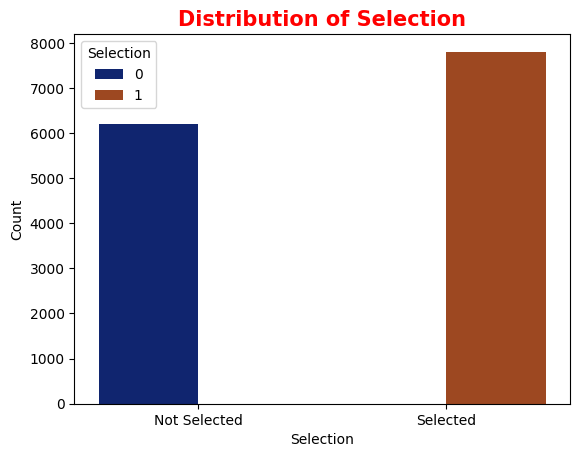

In [8]:
sns.countplot(data = data, x='selection', palette='dark', hue='selection')
plt.xlabel('Selection')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Selected', 'Selected'])
plt.title('Distribution of Selection', color = 'red', fontsize = 15, weight='bold')
plt.legend(title='Selection', loc='best')
plt.show()

From the plot, it can be inferred that the count of players who have been selected is higher than that of players who have not.

In [9]:
data['country'].nunique()

163

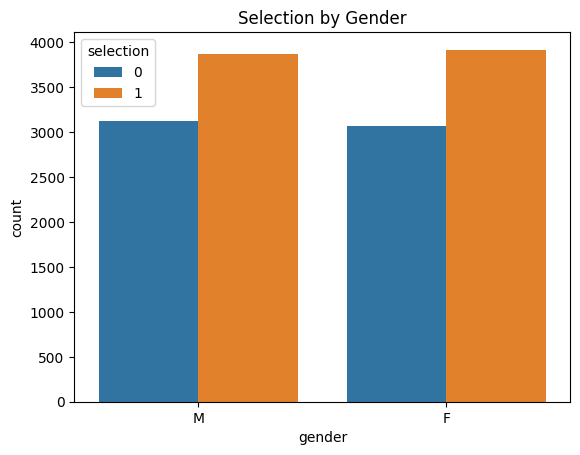

In [10]:
sns.countplot(x = data['gender'],hue = data['selection'])
plt.title('Selection by Gender')
plt.show()

It can be seen that both the genders have about equal number of candidates and the proportion of players who got selected from each of these two categories are about the same.

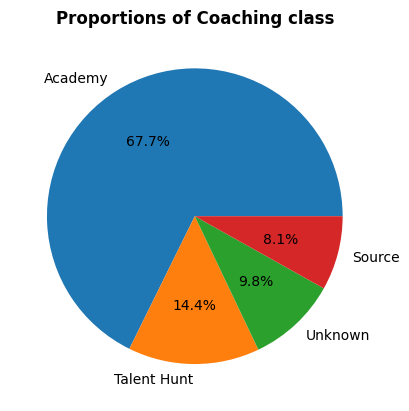

In [11]:
co = data['coaching'].value_counts()
plt.pie(co, labels = co.index, autopct = '%0.1f%%')
plt.title('Proportions of Coaching class', weight = 'bold')
plt.show()

A pie chart was drawn to indicate the proportions of coaching class of players. The following were the insights:

- Two-thirds of the players had got their coaching from the academy.

- About 8% of the players got their coaching from the 'Source', which is the least.

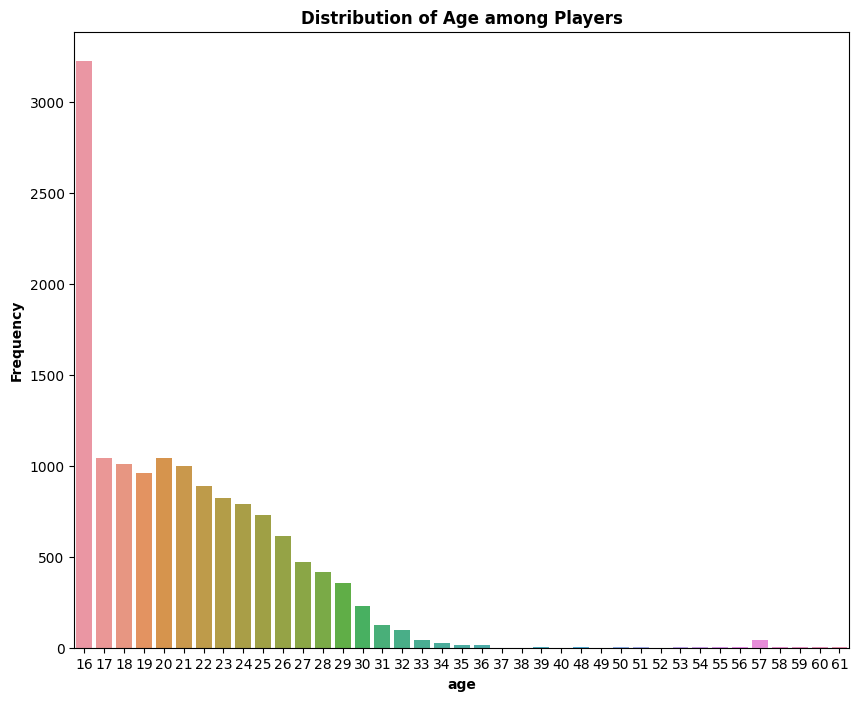

In [12]:
plt.figure(figsize=(10, 8))
sns.countplot(x = data['age'])
plt.xlabel('age',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.title('Distribution of Age among Players',fontweight='bold')
plt.show()

The gollowing insights can be drawn from the plot:

- The players from the age '16' is the largest proportion.

- There is a significant decrease in the proportion of players higher than the age of 30.

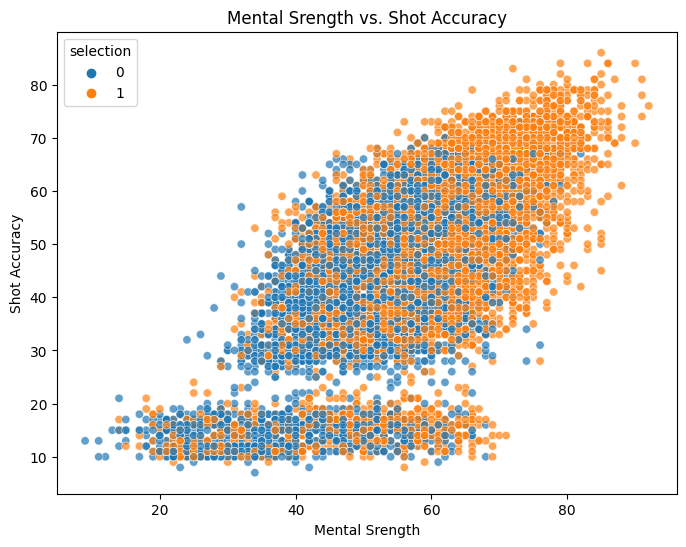

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x ='mental_strength', y ='shot_accuracy',hue ='selection',data = data, marker='o', color='g', alpha=0.7)

# Set labels and title
plt.xlabel('Mental Srength')
plt.ylabel('Shot Accuracy')
plt.title('Mental Srength vs. Shot Accuracy')

# Show the plot
plt.show()

A scatterplot was drawn to explore the relationship between mental strength and shot accuracy. It has shown the follwing indications:

- Shot accuracy are aligned with the appraised value of the mental strength, suggesting that the mental strength has a positive impact on the players' shot ability.

- The proportion of players who got selected increases as the mental strength as well as the shot accuracy increases.

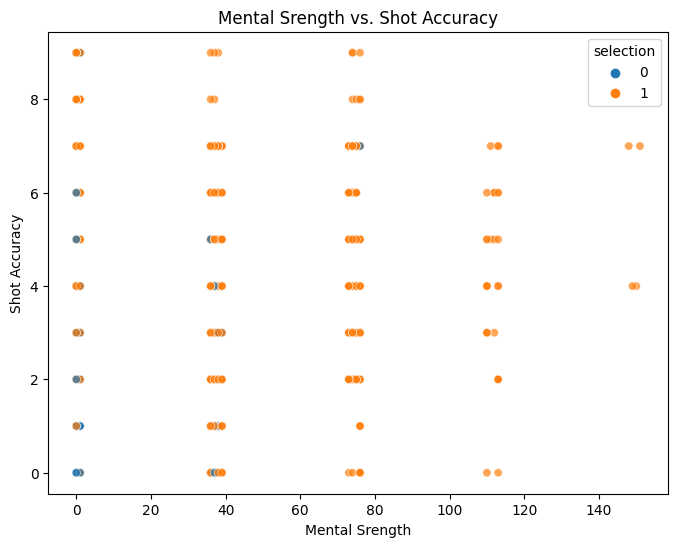

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x ='matches_played', y ='trophies_won',hue ='selection',data = data, marker='o', color='g', alpha=0.7)

# Set labels and title
plt.xlabel('Mental Srength')
plt.ylabel('Shot Accuracy')
plt.title('Mental Srength vs. Shot Accuracy')

# Show the plot
plt.show()

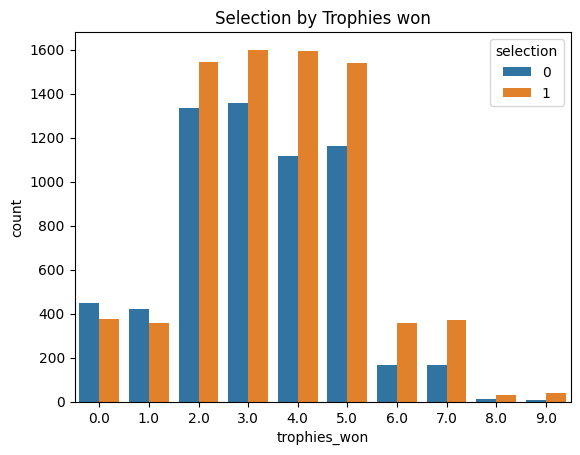

In [15]:
sns.countplot(x = data['trophies_won'],hue = data['selection'])
plt.title('Selection by Trophies won')
plt.show()

The following are the insights inferred from the plot:

- The proprtion of players who got selected to not selected is higher when the trophy count is more than 1.

- A large proportion of players got 2-5 trophies.

<ipython-input-16-5680e0f325ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, linewidth = 1)


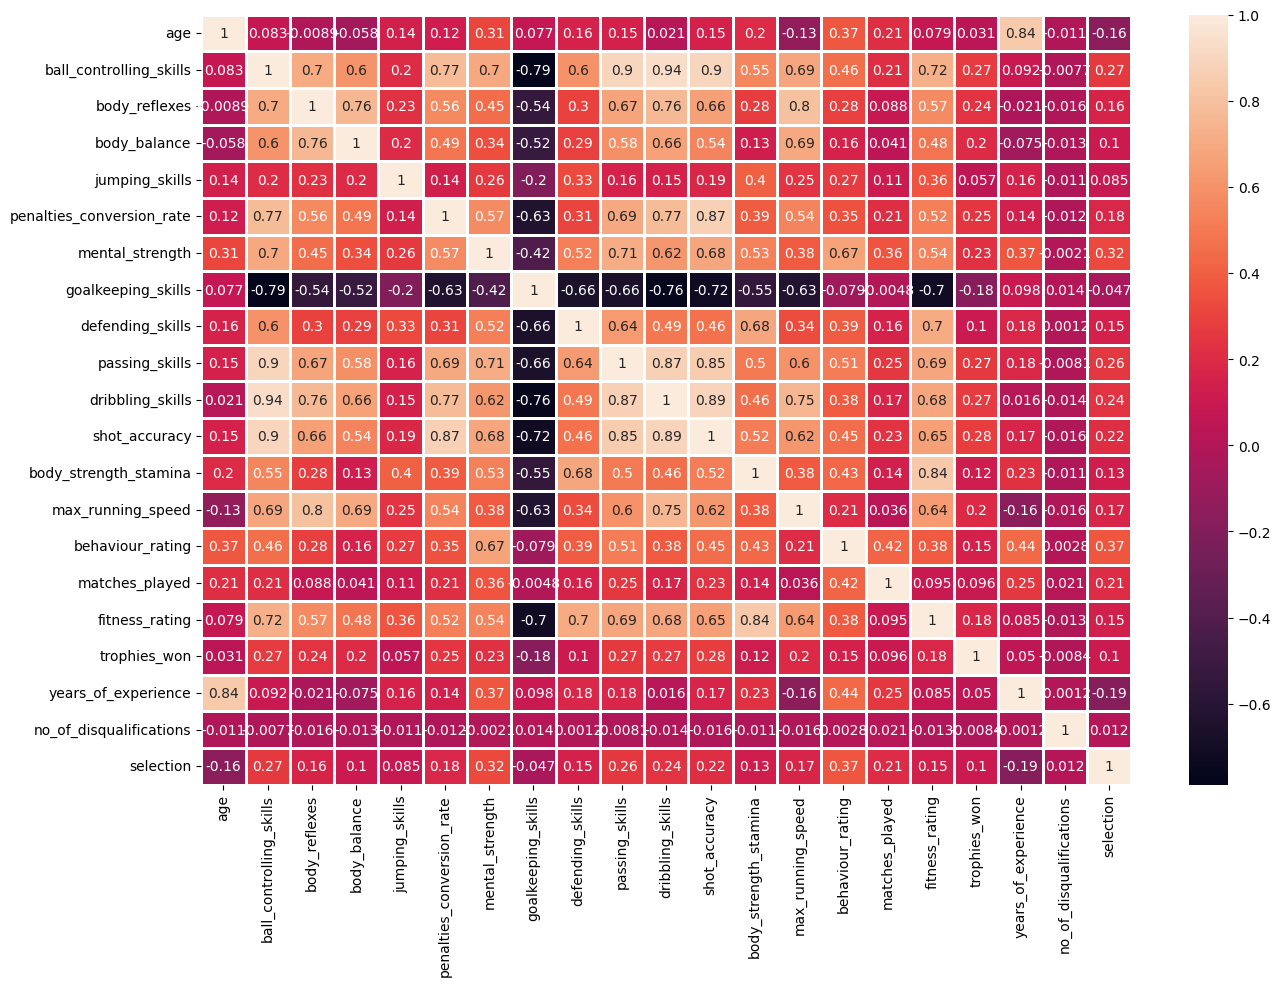

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot = True, linewidth = 1)
plt.show()

- The column 'no_of_disqualifications' have weak correlation with every other columns.

- The column 'goalkeeping_skills' has very weak correlation with the field skills.

- The behaviour skills and mental skills are the columns which has highest correlation with the selection, implying that these two affects largely on the selection of a player.

### **DATA PREPROCESSING**

In [17]:
#dropping unnecessary columns from the dataset
data.drop(['player_id', 'name', 'coaching', 'dedication_level', 'no_of_disqualifications'], axis = 1, inplace = True)


This reduced the column count to 25, focusing only on the essential features for the analysis.

In [18]:
#finding the number of missing values in each columns
data.isna().sum()

age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
years_of_experience          144
selection                      0
dtype: int64

**Handling Missing Values**

In [19]:
#seperating the numerical columns with null values in the dataset
num_col = ['ball_controlling_skills', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'shot_accuracy', 'behaviour_rating', 'matches_played', 'fitness_rating', 'years_of_experience']

# filling the missing values in the numerical columns with their median
for i in num_col:
  data[i].fillna(data[i].median(), inplace=True)

In [20]:
# Fill missing values in 'gender' and 'strong_foot' with the most frequent value
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['strong_foot'].fillna(data['strong_foot'].mode()[0], inplace=True)

In [21]:
data['height'].unique()

array(["6'2", "5'10", "5'11", "5'8", "6'0", "6'1", "5'9", "5'6", "6'3",
       "5'7", "6'4", "6'6", "5'5", "6'5", "7'1", "5'3", "6'7", "5'4",
       "12'1", "6'11", "6'8", "1'5", "9'5", "6'9", "11'0", "10'2", "5'2",
       "99'0", "89'1", "8'3", "4'5"], dtype=object)

In [22]:
#preprocess 'weight' column to convert weight groups to kg
def preprocess_age(weight_group):
    if pd.notnull(weight_group):
        if isinstance(weight_group, float):
            return weight_group
        elif isinstance(weight_group, str):
            weight = float(weight_group[:3]) * 0.4535
            return weight
    return weight_group

data['weight'] = data['weight'].apply(preprocess_age)

In [23]:
#preprocess 'height' column to convert height groups to m
def preprocess_age(height_group):
    if pd.notnull(height_group):
        if isinstance(height_group, float):
            return height_group
        elif isinstance(height_group, str):
            height_range = height_group.split("'")
            return ((float(height_range[0]) * 30.48) + (float(height_range[1]) * 2.54))/100
    return height_group

data['height'] = data['height'].apply(preprocess_age)

In [24]:
# Remove rows with any missing values from the dataFrame
data.dropna(axis=0, inplace=True)

In [25]:
data.isna().sum()

age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
years_of_experience          0
selection                    0
dtype: int64

In [26]:
data.shape

(13577, 25)

**Outlier Handling**

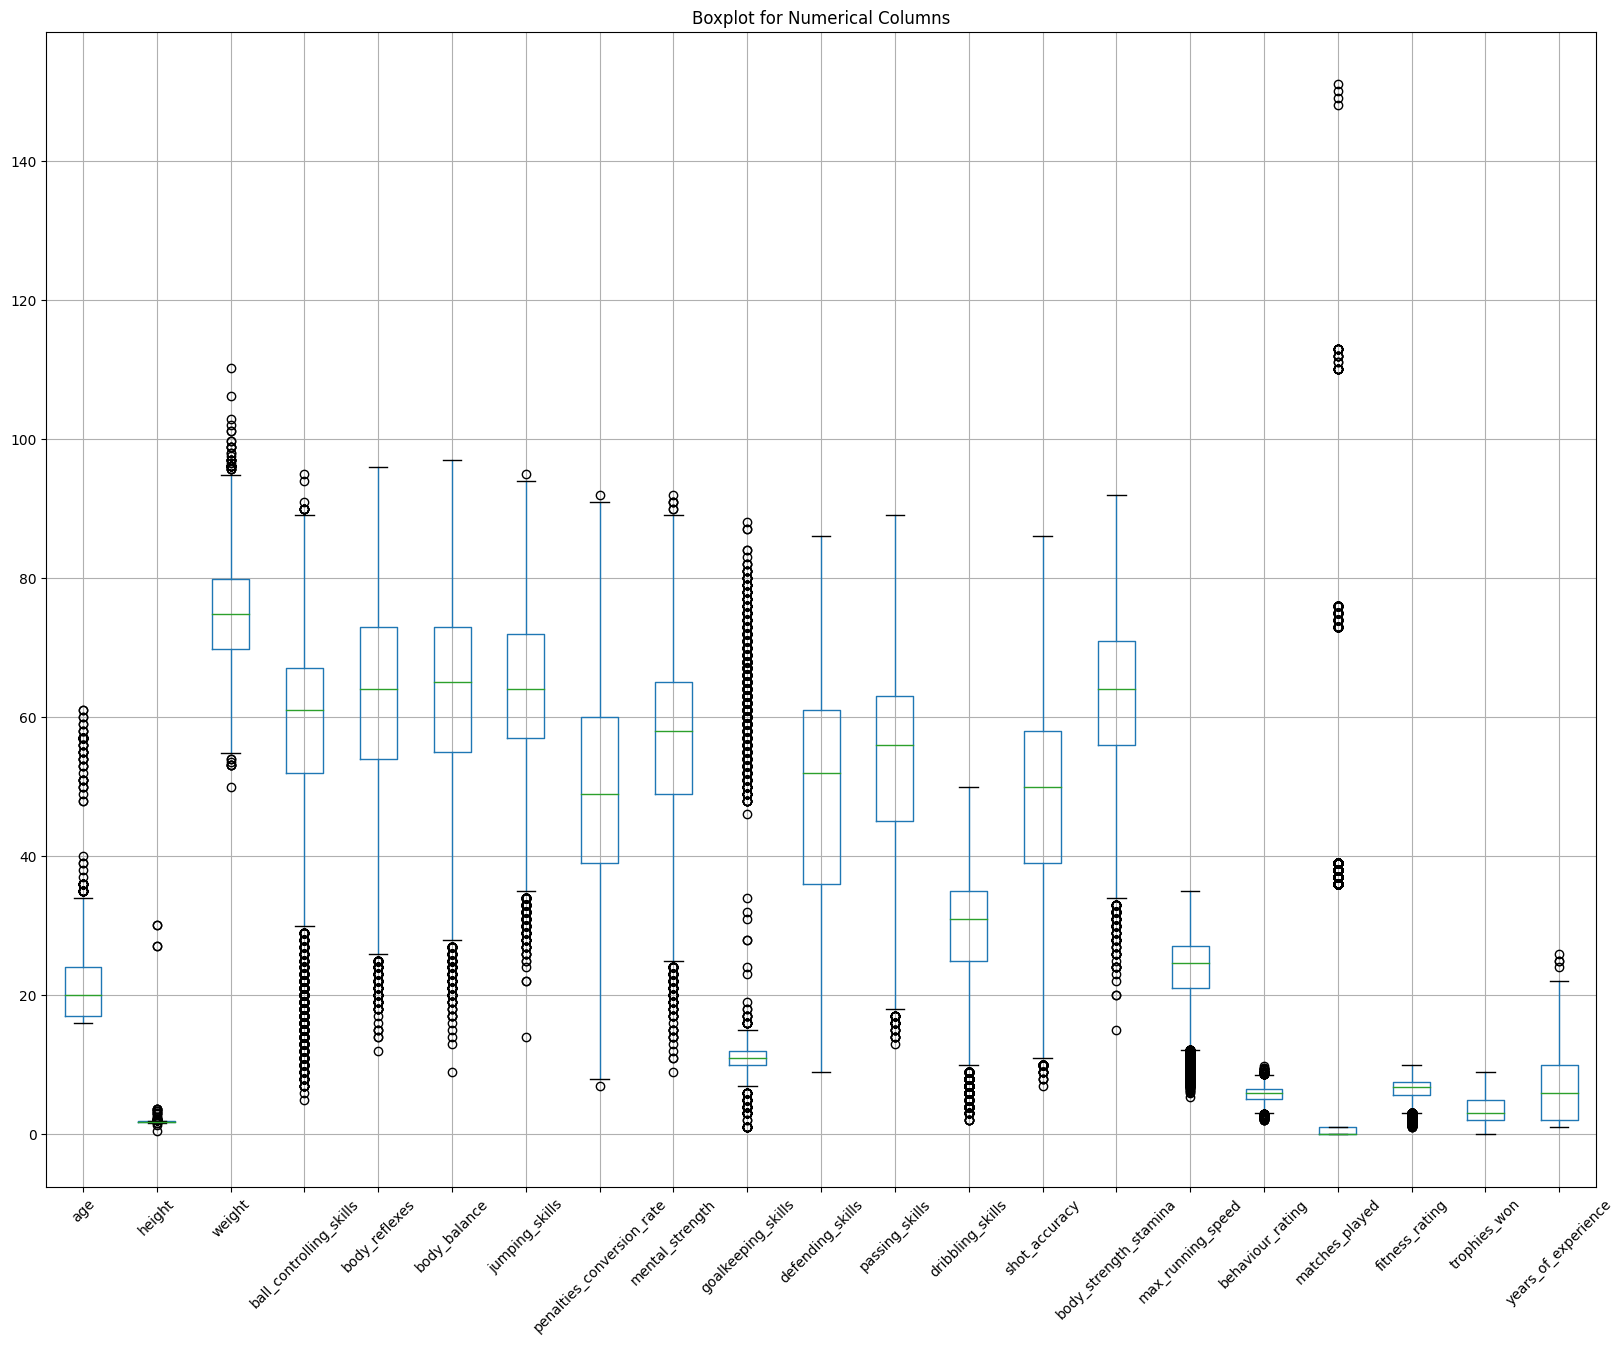

In [27]:
numerical_columns = ['age', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won',
       'years_of_experience']

# Create a boxplot for each numerical column
plt.figure(figsize=(20, 15))
data[numerical_columns].boxplot()
plt.title('Boxplot for Numerical Columns')
plt.xticks(rotation=45)
plt.show()

- There are some columns which exhibit outliers beyond the whiskers of the boxplot.

- It is essential to handle these outliers during data preprocessing to avoid any adverse effects on the performance of machine learning models.


In [28]:
# Handling outliers using winsorization (trimming extreme values)
from scipy.stats.mstats import winsorize

for i in numerical_columns:
  data[i] = winsorize(data[i], limits=[0.05, 0.05])

- The code uses the winsorize function from scipy.stats.mstats to handle outliers in the columns

- Winsorization is a method to trim or cap extreme values in a loanset, and it is performed by setting a percentage limit on both the lower and upper tails of the distribution.

- In this case, the lower and upper tails are trimmed by 5% of the data points, meaning the extreme 5% of values in each column are replaced by the nearest non-extreme values.

- By winsorizing these columns, extreme values that might be outliers are replaced with more reasonable values, which helps to make the data distribution less sensitive to outliers.

**Duplicates**

In [29]:
# Check for duplicates in the DataFrame
duplicate_rows = data[data.duplicated()]

# If there are duplicates, print the number of duplicate rows
if not duplicate_rows.empty:
    print(f"Number of duplicate rows: {len(duplicate_rows)}")
else:
    print("No duplicates found in the DataFrame.")

# Remove duplicates from the DataFrame
data.drop_duplicates(inplace=True)

# Print the new shape of the DataFrame after removing duplicates
print("\n")
print("Shape after removing duplicates:", data.shape)


No duplicates found in the DataFrame.


Shape after removing duplicates: (13577, 25)


**Encoding**

In [30]:
#categorical columns
cat= [x for x in data.columns if data[x].dtypes=='O']

#Encoding
from sklearn.preprocessing import LabelEncoder
for x in cat:
    le=LabelEncoder()
    data[x]=le.fit_transform(data[x])

- The code first identifies the categorical columns in the DataFrame. It does this by iterating through all columns and checking if the data type of each column is 'object' (i.e., string or categorical).

- Once the categorical columns are identified, the code proceeds to encode them using LabelEncoder. LabelEncoder is used to transform categorical data into numerical labels. It assigns a unique integer to each category present in a column.

In [31]:
data.describe()

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,selection
count,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000,13577.000000
mean,20.874494,0.500405,74.930176,1.810008,75.056605,56.209987,62.031377,62.893054,63.702585,48.451352,56.976946,16.211829,48.075422,52.913604,28.539957,47.198424,62.734993,23.671437,2.272667,5.829999,2.998527,6.437571,3.332695,6.350004,0.557782
std,4.228765,0.500018,46.683159,0.063441,6.402562,15.765271,14.147012,13.107199,10.851223,14.892786,10.729408,15.936168,16.232980,13.538384,9.402857,14.926202,10.611019,4.781559,1.053329,0.974162,9.668587,1.559716,1.596259,4.250314,0.496668
min,16.000000,0.000000,0.000000,1.701800,63.943500,17.000000,32.000000,35.000000,41.000000,18.000000,36.000000,8.000000,16.000000,24.000000,7.000000,14.000000,41.000000,12.800000,0.000000,4.000000,0.000000,2.800000,0.000000,1.000000,0.000000
25%,17.000000,0.000000,38.000000,1.752600,69.839000,52.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,25.000000,39.000000,56.000000,21.100000,1.000000,5.100000,0.000000,5.700000,2.000000,2.000000,0.000000
50%,20.000000,1.000000,66.000000,1.803400,74.827500,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,31.000000,50.000000,64.000000,24.600000,3.000000,5.900000,0.000000,6.800000,3.000000,6.000000,1.000000
75%,24.000000,1.000000,122.000000,1.854200,79.816000,67.000000,73.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,35.000000,58.000000,71.000000,27.100000,3.000000,6.500000,1.000000,7.500000,5.000000,10.000000,1.000000
max,29.000000,1.000000,161.000000,1.930400,87.072000,75.000000,84.000000,83.000000,82.000000,71.000000,75.000000,64.000000,70.000000,72.000000,40.000000,68.000000,78.000000,30.800000,3.000000,7.600000,37.000000,8.700000,6.000000,15.000000,1.000000


### **MODELLING**

In [33]:
# 'Status' is the target variable
x = data.drop('selection', axis=1)
y = data['selection']

In [34]:
#splitting dataset into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logic = LogisticRegression()

In [36]:
logic.fit(x_train, y_train)
y_lr = logic.predict(x_test)

print(accuracy_score(y_test, y_lr))
print(confusion_matrix(y_test, y_lr))

0.7684094256259205
[[ 874  340]
 [ 289 1213]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**KNN**

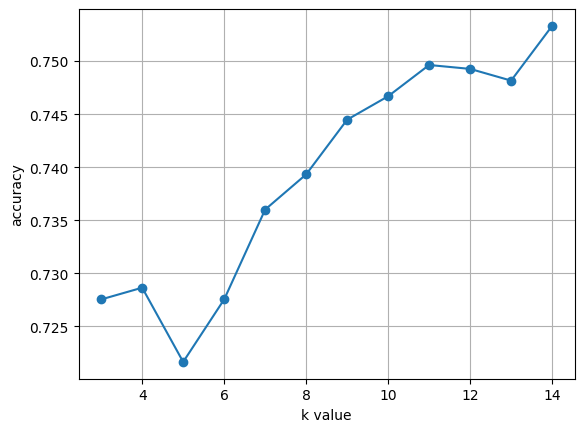

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
metric = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(x_train, y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred_knn)
    metric.append(acc)


plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [38]:
classifier = KNeighborsClassifier(n_neighbors = 14, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_knn = classifier.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_knn))
print(confusion_matrix(y_test, y_knn))

Accuracy = 0.7533136966126657
[[ 920  294]
 [ 376 1126]]


**Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt = dt.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_dt))
print(confusion_matrix(y_test, y_dt))

Accuracy = 0.7853460972017673
[[ 931  283]
 [ 300 1202]]


**Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_rf = dt.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_rf))
print(confusion_matrix(y_test, y_rf))

Accuracy = 0.7853460972017673
[[ 931  283]
 [ 300 1202]]


**XGBOOST**

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_xgb = xgb.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_xgb))
print(confusion_matrix(y_test, y_xgb))

Accuracy = 0.8586156111929307
[[1023  191]
 [ 193 1309]]


The xgboost model has the highest accuracy among the models used with an accuracy of 85.86%. So xgboost model is used for the prediction of this dataset.

In [42]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameters and their distributions for Randomized Search
param_dist = {
    'max_depth': stats.randint(3, 8),
    'min_child_weight': stats.randint(1, 6),
    'subsample': stats.uniform(0.6, 0.4),
    'colsample_bytree': stats.uniform(0.6, 0.4),
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the Randomized Search object
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(verbosity=0),  # Set verbosity to 0 to suppress output
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

# Fit the Randomized Search object to the training data
random_search.fit(x_train, y_train)

# Get the best model from the randomized search
best_xgb = random_search.best_estimator_

# Predict using the best model on the test set
y_pred = best_xgb.predict(x_test)

# Print the accuracy and confusion matrix of the best model
print("Accuracy after Fine-Tuning:", accuracy_score(y_test, y_pred))
print("Confusion Matrix after Fine-Tuning:")
print(confusion_matrix(y_test, y_pred))

Accuracy after Fine-Tuning: 0.8630338733431517
Confusion Matrix after Fine-Tuning:
[[1038  176]
 [ 196 1306]]
